In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('bankexam.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Define Problems

Dari data diatas terdapat 2037 NASABAH YANG PINDAH BANK dan 7963 tetap menjadi nasabah existing (PROBLEM) sehingga bagaimana cara nya sebuah Bank agar tetap mempertahankan tiap Nasabahnya untuk tetap Loyal

## Tujuan 

sehingga bagaimana cara nya sebuah Bank agar tetap mempertahankan tiap Nasabahnya untuk tetap Loyal

In [24]:
df.isna().sum() # Tidak tedapat missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df.describe()['Balance']

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

1. Terdapat 1000 account yang pernah menjadi debitur di Bank
2. Dengan rata2 Balance / Baki Debet adalah 76,485
3. Adapun nilai Balance / Baki Debet tertinggi 250,985

In [35]:
Country = df['Geography'].value_counts()
Country

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

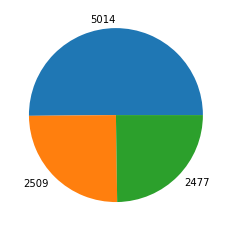

In [38]:
plt.pie(Country, labels=Country)
plt.show()

1. Nasabah Paling Banyak Berasal dari Negara France / Perancis sebanyak 5014

In [40]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# DN20 = df[df['Delta_Price'] > 20] #data frame filter 20% keatas

In [42]:
fd_exit = df[df['Exited'] == 1]
fd_exit

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [44]:
fd_stay = df[df['Exited'] == 0]
fd_stay

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [43]:
fd_exit.describe()['EstimatedSalary'] ## Summary Debitur yang Keluar dari Bank

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

In [45]:
fd_stay.describe()['EstimatedSalary'] ## Summary Debitur yang Stay di Bank

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [51]:
Country_exit = fd_exit['Geography'].value_counts()
Country_exit

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

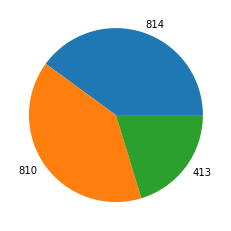

In [56]:
plt.pie(Country_exit, labels=Country_exit)
plt.show()

In [ ]:
# Debitur yang pindah dari Bank mayoritas dari Negara Germany dan France, disusul oleh Spain